# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Silvy Aqila Maharani
- **Email:** silvy.aqila2604@mail.ugm.ac.id
- **ID Dicoding:** silvy_aqila

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan peminjaman sepeda pada Bike Sharing System selama tahun 2011 hingga 2012 setiap bulannya?
- Apakah terdapat hubungan antara jumlah peminjaman sepeda dan waktu peminjaman?

 ## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
day_df = pd.read_csv("/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

Data hour_df

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah data duplicate:",hour_df.duplicated().sum())

Jumlah data duplicate: 0


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah data duplicate:",day_df.duplicated().sum())

Jumlah data duplicate: 0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Terlihat pada tahap Assesing Data yang ditampilkan pada setiap data bahwa kedua data, baik hour_df maupun day_df, tidak memiliki data yang bersifat null atau tidak terdapat missing value, tidak memiliki data duplikat, dan memiliki value yang sesuai dengan kolom masing-masing, sehingga tidak dilakukan Cleaning Data dan kedua data dapat langsung digunakan.

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [12]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5992,5993,2011-09-12,3,0,9,6,0,1,1,1,0.56,0.5303,0.83,0.0000,1,108,109
3127,3128,2011-05-15,2,0,5,5,0,0,0,3,0.52,0.5000,1.00,0.1045,3,11,14
583,584,2011-01-26,1,0,1,14,0,3,1,3,0.22,0.1970,0.93,0.3582,0,36,36
11516,11517,2012-04-30,2,1,4,1,0,1,1,1,0.42,0.4242,0.77,0.0896,9,15,24
1142,1143,2011-02-20,1,0,2,9,0,0,0,1,0.22,0.2121,0.47,0.2836,7,48,55


In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [14]:
hour_df.instant.is_unique

True

In [15]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

### Explore day_df

In [16]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
555,556,2012-07-09,3,1,7,0,1,1,2,0.710833,0.654054,0.683333,0.180975,998,5571,6569
663,664,2012-10-25,4,1,10,0,4,1,2,0.550000,0.529688,0.800417,0.124375,875,6484,7359
78,79,2011-03-20,1,0,3,0,0,0,1,0.332500,0.325750,0.473750,0.207721,1047,1424,2471
547,548,2012-07-01,3,1,7,0,0,0,1,0.815833,0.750629,0.518750,0.168529,1421,4110,5531


In [17]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [18]:
day_df.instant.is_unique

True

In [19]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

In [20]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [21]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

In [22]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [23]:
monthly_df= day_df.groupby(by=["yr","mnth"]).agg({
    "instant":"nunique",
    "cnt":"sum"
  })
monthly_df= monthly_df.reset_index()
monthly_df["yr-mnth"] = ["Jan-11","Feb-11","Mar-11","Apr-11","May-11","Jun-11","Jul-11","Aug-11","Sep-11","Oct-11","Nov-11","Des-11",
                         "Jan-12","Feb-12","Mar-12","Apr-12","May-12","Jun-12","Jul-12","Aug-12","Sep-12","Oct-12","Nov-12","Des-12"]
monthly_df

,yr,mnth,instant,cnt,yr-mnth
0,0,1,31,38189,Jan-11
1,0,2,28,48215,Feb-11
2,0,3,31,64045,Mar-11
3,0,4,30,94870,Apr-11
4,0,5,31,135821,May-11
5,0,6,30,143512,Jun-11
6,0,7,31,141341,Jul-11
7,0,8,31,136691,Aug-11
8,0,9,30,127418,Sep-11
9,0,10,31,123511,Oct-11


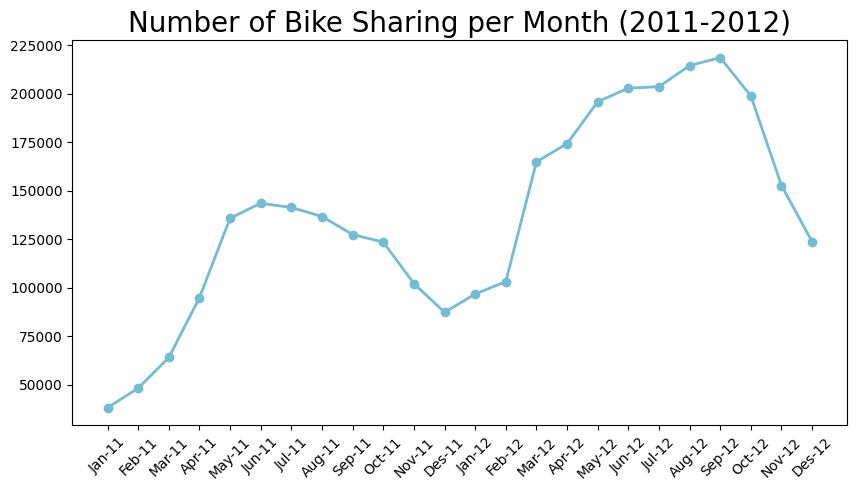

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_df["yr-mnth"],monthly_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing per Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

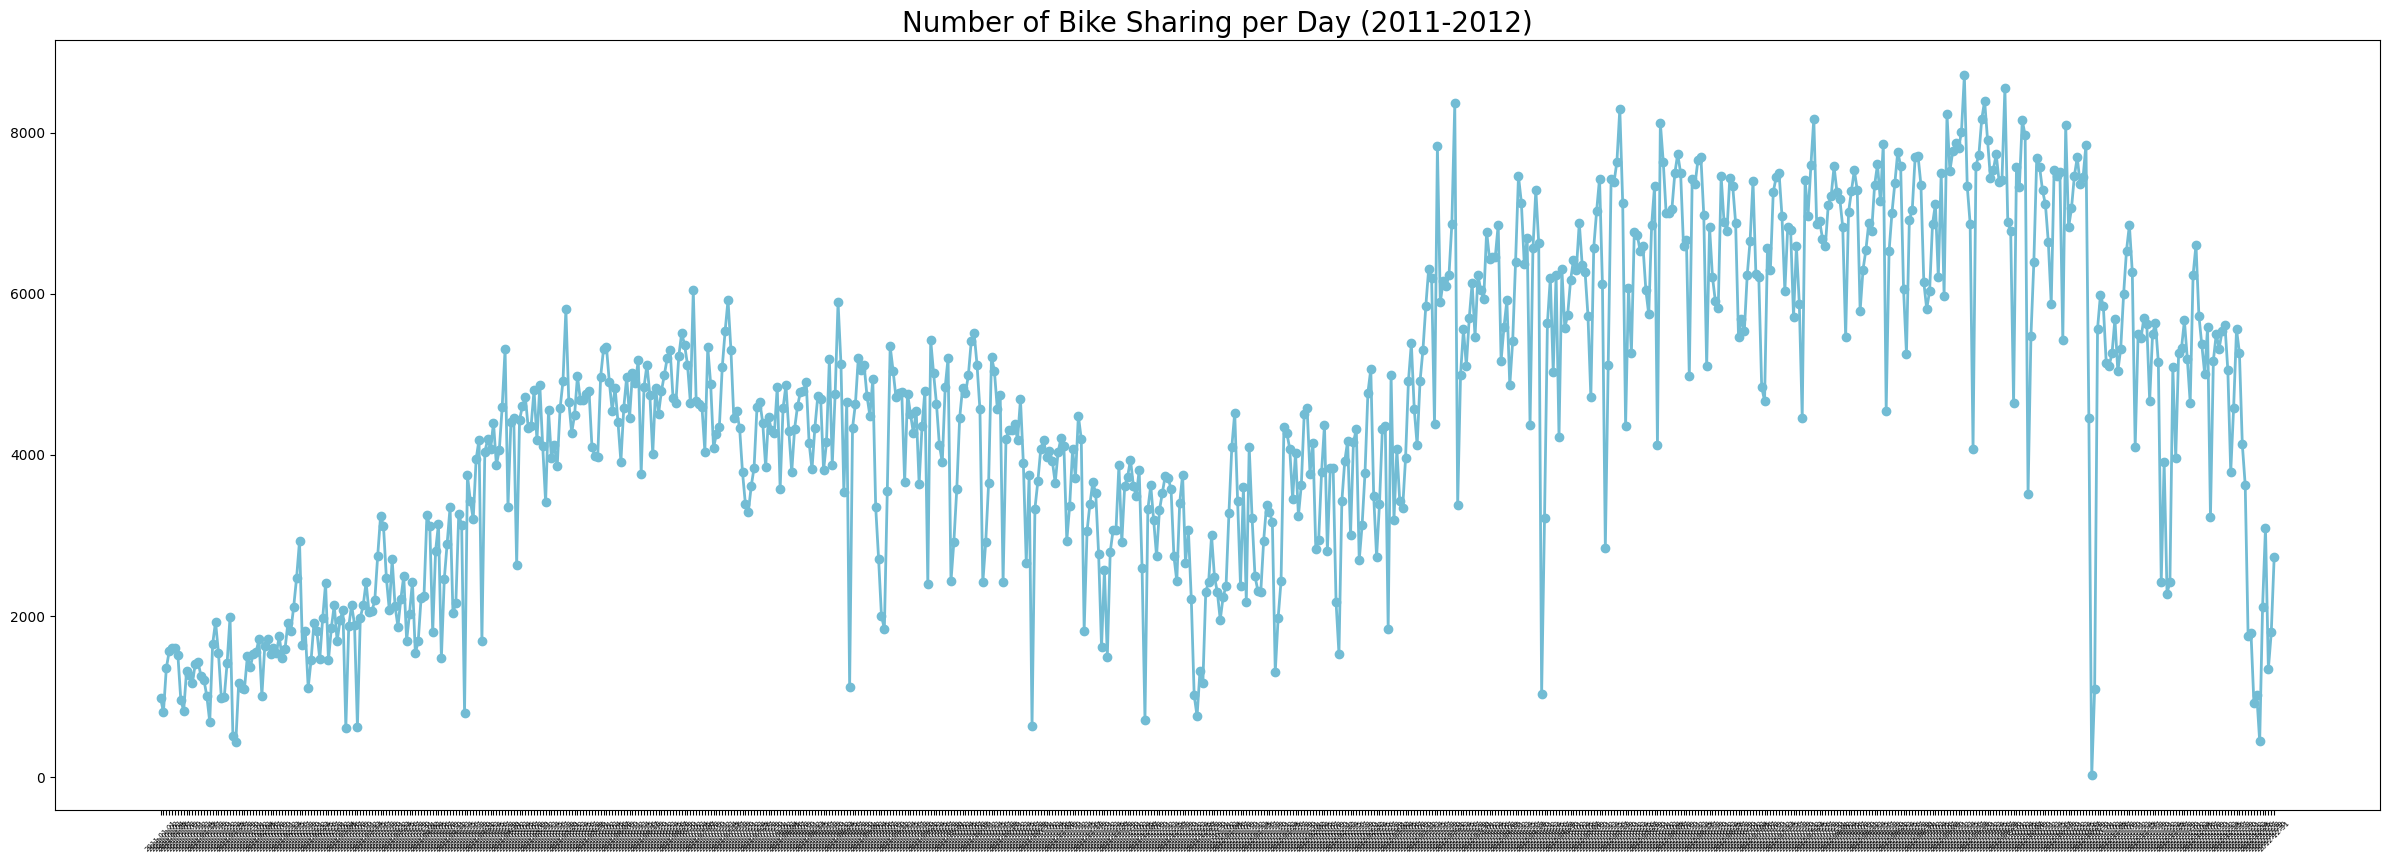

In [34]:
plt.figure(figsize=(30, 10))
plt.plot(day_df["dteday"],day_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing per Day (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=5,rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

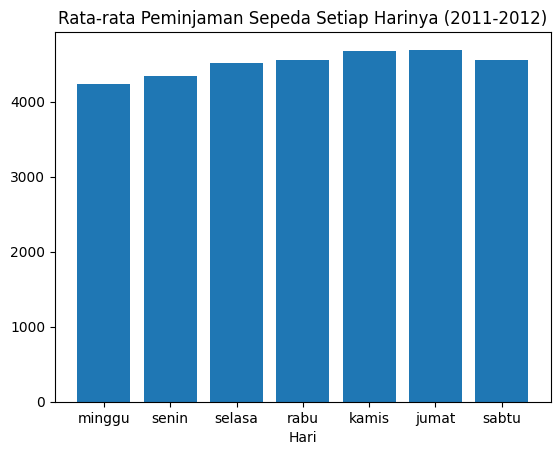

In [26]:
# Weekday

weekday_df = day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": "mean"
})

weekday_df.rename(index={0:'minggu',1: 'senin',2:'selasa',3:'rabu',4:'kamis',5:'jumat',6:'sabtu'}, inplace=True)

plt.bar(x=weekday_df.index, height=weekday_df["cnt"])
plt.xlabel("Hari")
plt.title("Rata-rata Peminjaman Sepeda Setiap Harinya (2011-2012)")
plt.show()

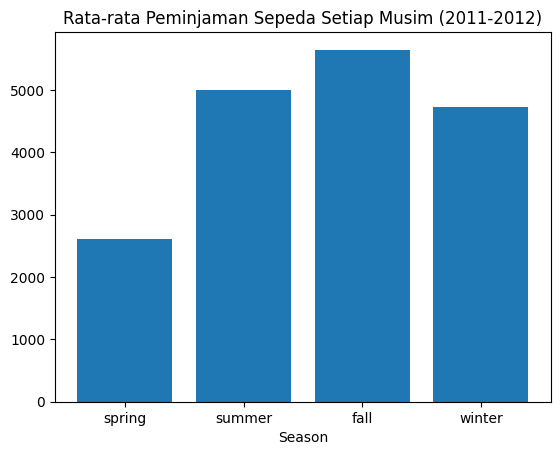

In [27]:
# Season

season_df = day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": "mean"
})

season_df.rename(index={1: 'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)

plt.bar(x=season_df.index, height=season_df["cnt"])
plt.xlabel("Season")
plt.title("Rata-rata Peminjaman Sepeda Setiap Musim (2011-2012)")
plt.show()

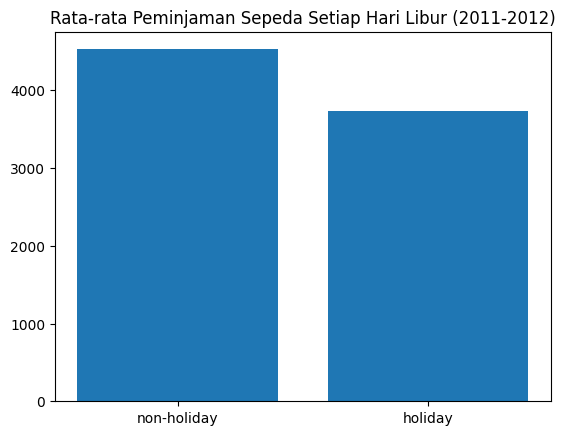

In [28]:
# Holiday

holiday_df = day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": "mean"
})

holiday_df.rename(index={0: 'non-holiday',1:'holiday'}, inplace=True)

plt.bar(x=holiday_df.index.astype(str), height=holiday_df["cnt"])
plt.title("Rata-rata Peminjaman Sepeda Setiap Hari Libur (2011-2012)")
plt.show()

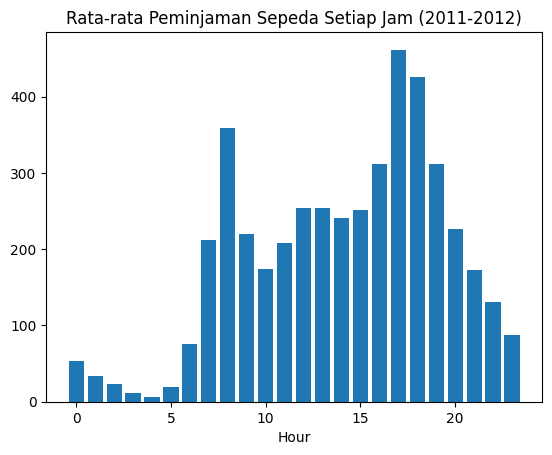

In [29]:
# Hour

hoursdf = hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": "mean"
})

plt.bar(x=hoursdf.index, height=hoursdf["cnt"])
plt.xlabel("Hour")
plt.title("Rata-rata Peminjaman Sepeda Setiap Jam (2011-2012)")
plt.show()

## Conclusion

### Pertanyaan 1

Dari plot yang terbentuk, terlihat bahwa jumlah peminjaman sepeda berkembang pada waktu-waktu tertentu. Pada tahun 2011, terlihat bahwa peminjaman sepeda mulai mengalami peningkatan secara signifikan hingga bulan Juni dan kembali menurun hingga bulan Desember. Pada tahun 2012, terlihat bahwa peminjaman sepeda kembali mengalami kenaikan pesat melebihi kenaikan sebelumnya hingga bulan September 2012, kemudian kembali menurun hingga akhir tahun.

Dari deskripsi sebelumnya, dapat disimpulkan bahwa peminjaman sepeda pada pertengahan tahun memiliki peminat yang cukup besar dibandingkan awal dan akhir tahun. Peminjaman sepeda diidentifikasi sangat besar pada sekitar bulan Juni hingga Agustus di kedua tahun. Hal ini memberikan pengetahuan bahwa pelayanan dan ketersediaan peminjaman sepeda harus ditingkatkan pada bulan-bulan tersebut sehingga peminjaman sepeda setiap tahunnya dapat mengalami peningkatan.

### Pertanyaan 2

Pada plot yang terbentuk, berdasarkan pengelompokkan weekday, terlihat bahwa rata-rata peminjaman sepeda tidak mengalami perbedaan signifikan setiap harinya. Namun, rata-rata peminjaman sepeda terlihat memuncak pada hari kamis dan jumat, kemudian kembali menurun pada hari sabtu dan minggu. Berdasarkan pengelompokkan musim, terlihat bahwa musim gugur (fall) memiliki rata-rata tertinggi peminjaman sepeda dan musim semi (spring) memiliki rata-rata terendah peminjaman sepeda. Berdasarkan pengelompokkan holiday dan non-holiday, peminjaman sepeda lebih banyak dilakukan pada hari non-holiday. Sedangkan, berdasarkan pengelompokkan waktu dalam satuan jam, terlihat bahwa rata-rata peminjaman sepeda memuncak pada jam ke-8 (pukul 8 pagi) dan jam ke-17 serta 18 (pukul 5 hingga 6 sore).

Dari kesimpulan yang di ambil dari masing-masing plot, dapat disimpulkan bahwa rata-rata peminjaman sepeda dilakukan lebih banyak pada weekday (hari kerja), terutama pada pukul 8 pagi dan pukul 5 hingga 6 sore. Selain itu, rata-rata peminjaman sepeda diidentifikasi memuncak pada musim gugur.